<h3>Importing Libraries</h3>
<p>In this cell, the necessary Python libraries such as pandas, yfinance, and datetime are imported for data handling and time series analysis.</p>

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt;
import plotly.express as px;
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#from sklearn.metrics import mean_squared_error


ModuleNotFoundError: No module named 'plotly'

<h3>Data Collection</h3>


In [2]:
today = date.today()
print("TODAYS DATE:",today)
end_date = today.strftime("%Y-%m-%d")

d1 = date.today() - timedelta(days=1460)
start_date = d1.strftime("%Y-%m-%d")

data = pd.read_csv('E:\Python-Arima model\zomato_stock_data.csv')
#data["Date"] = data.index
df = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head(5))

TODAYS DATE: 2024-12-17
         Date        Open        High         Low       Close   Adj Close  \
0  23-07-2021  116.000000  138.899994  115.000000  126.000000  126.000000   
1  26-07-2021  126.349998  143.750000  125.300003  140.649994  140.649994   
2  27-07-2021  141.699997  147.800003  127.750000  132.899994  132.899994   
3  28-07-2021  131.000000  135.000000  123.550003  131.199997  131.199997   
4  29-07-2021  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  
0  694895290  
1  249723854  
2  240341900  
3  159793731  
4  117973089  


<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Apurva\AppData\Local\Temp\ipykernel_23432\2751953046.py:8: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('E:\Python-Arima model\zomato_stock_data.csv')


In [3]:
print(df.tail())

           Date        Open        High         Low       Close   Adj Close  \
693  15-05-2024  188.800003  193.399994  183.149994  192.000000  192.000000   
694  16-05-2024  192.899994  195.850006  189.000000  195.199997  195.199997   
695  17-05-2024  195.149994  196.000000  193.100006  194.850006  194.850006   
696  21-05-2024  194.399994  196.500000  188.750000  189.100006  189.100006   
697  22-05-2024  190.000000  190.000000  183.350006  185.500000  185.500000   

       Volume  
693  44772997  
694  35478593  
695  20841351  
696  33453174  
697  40354936  


<h3>Data Preprocessing</h3>
<p>Here, the data is further preprocessed. It narrows down the dataset to include only the 'Date' and 'Close' columns. The code also resets the index for data consistency.</p>

In [4]:
df = df[["Date", "Close"]]
print(df.head())

         Date       Close
0  23-07-2021  126.000000
1  26-07-2021  140.649994
2  27-07-2021  132.899994
3  28-07-2021  131.199997
4  29-07-2021  141.550003


<h3>Data Visualization</h3>
<p>This cell uses the matplotlib library to create a time series plot of the closing prices of zomato's stock. style is applied for visualization.</p>

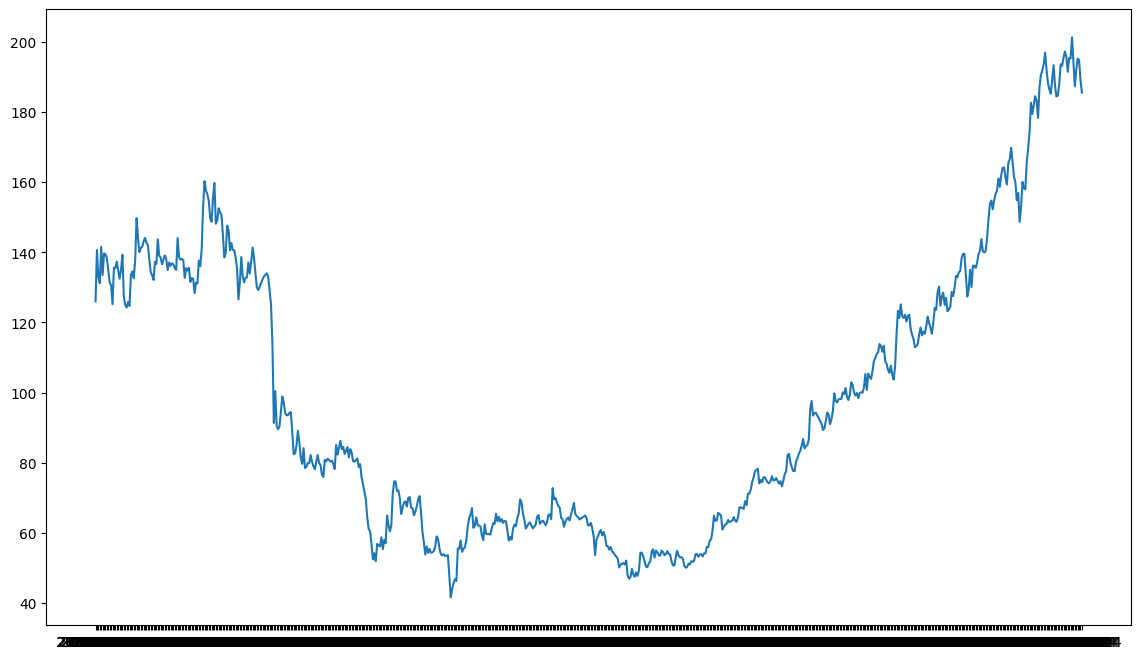

In [5]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(14, 8))
plt.plot(df["Date"], df["Close"])

<h3>Time Series Decomposition</h3>
<p>The statsmodels library is utilized for seasonal decomposition. This cell separates the trend, seasonality, and residual components of the stock prices.</p>

<Figure size 640x480 with 0 Axes>

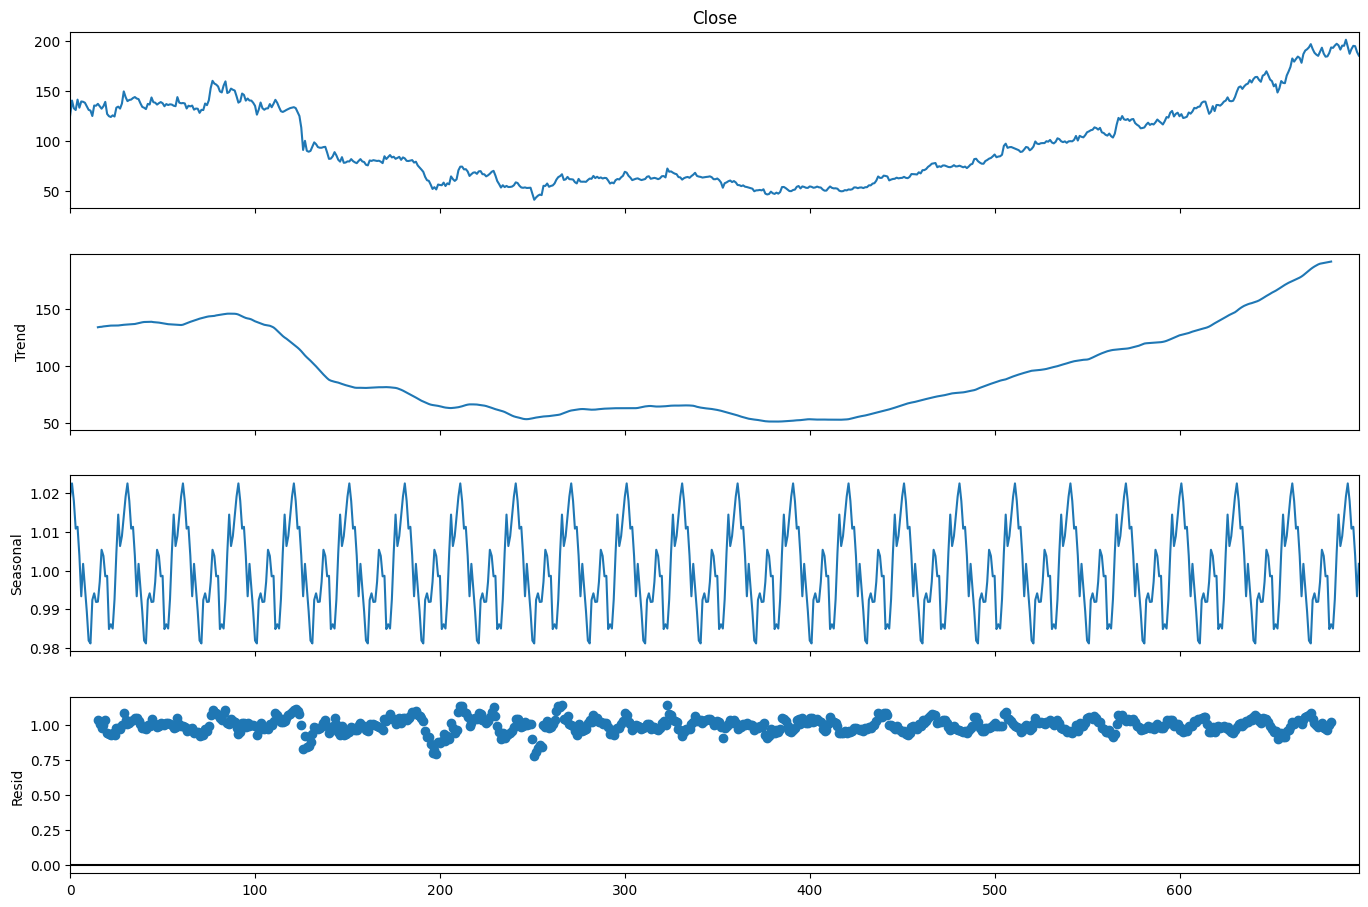

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<h3>AutoCorrelation Plot</h3>
<p>AutoCorrelation is visualized using the pandas library, helping identify potential time series patterns.</p>

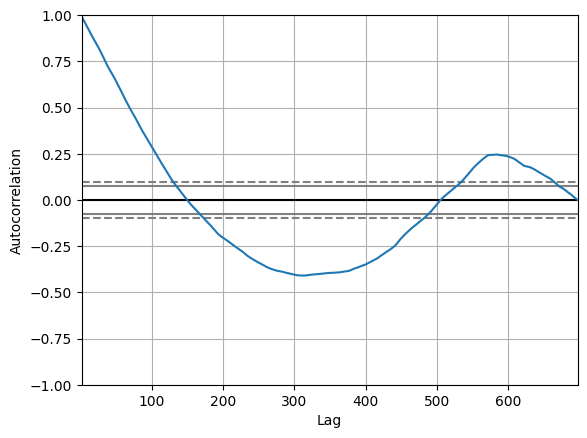

<Figure size 1400x700 with 0 Axes>

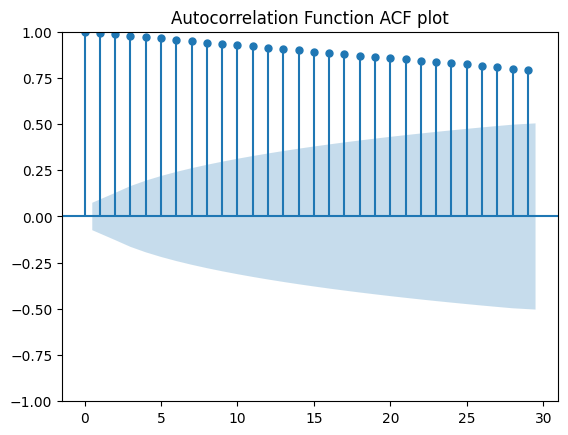

In [7]:

pd.plotting.autocorrelation_plot(df["Close"])
plt.figure(figsize=(14,7))
plot_acf(df['Close'])
plt.title('Autocorrelation Function ACF plot')
plt.show()


<h3>Partial AutoCorrelation Plot</h3>
<p>This cell generates the Partial AutoCorrelation Function (PACF) plot to aid in parameter selection for the ARIMA model.</p>

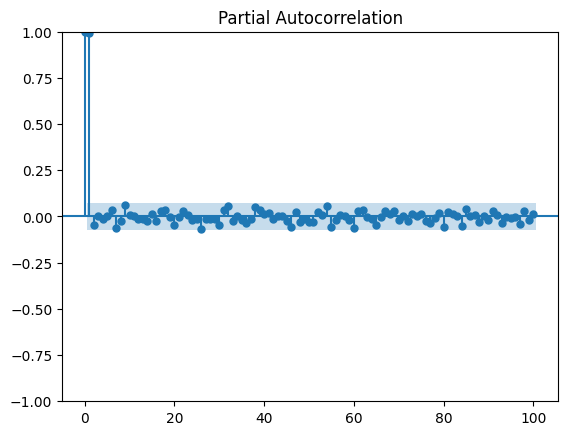

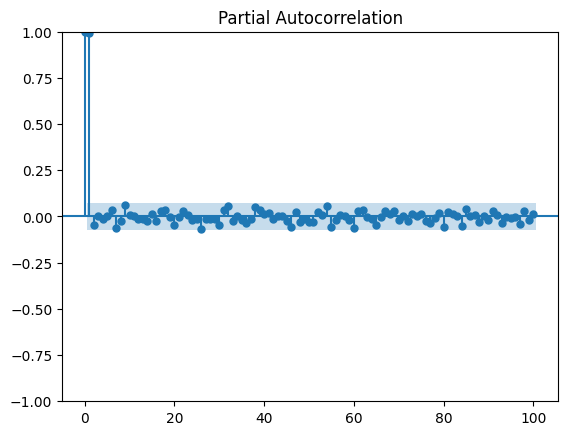

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

In [9]:
#lets run arima with pmdarima
from pmdarima.arima  import auto_arima
model = auto_arima (df['Close'],start_P= 2, start_q= 2, max_p=5, max_q =5, start_p=0, seasonal=True,d =1, D =1, trace=True, error_action='ignore', suppress_warnings=True)
model = auto_arima(df['Close'], seasonal=True,suppress_warnings=True)
print(model.summary())



ModuleNotFoundError: No module named 'pmdarima'

<h3>ARIMA Modeling</h3>
<p>The ARIMA (AutoRegressive Integrated Moving Average) model is constructed here. It fits the model to the 'Close' prices with specified parameters and prints a summary of the model.</p>

In [28]:
p, d, q = 6,0,1
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  698
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -1809.782
Date:                Mon, 16 Dec 2024   AIC                           3637.563
Time:                        19:43:04   BIC                           3678.497
Sample:                             0   HQIC                          3653.389
                                - 698                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.0528     58.913      1.664      0.096     -17.414     213.520
ar.L1          1.7063      2.446      0.698      0.485      -3.087       6.500
ar.L2         -0.7527      2.417     -0.311      0.7

<h3>ARIMA Predictions</h3>
<p>This cell generates predictions using the ARIMA model and prints the results.</p>

In [29]:
predictions = fitted.predict()
print(predictions)

0       98.052842
1      125.948551
2      140.414031
3      132.159028
4      131.935284
          ...    
693    187.730682
694    191.884725
695    194.655487
696    194.758488
697    189.066195
Name: predicted_mean, Length: 698, dtype: float64


<h3>SARIMAX Predictions</h3>
<p>Predictions for future stock prices are generated using the SARIMAX model.</p>

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary()) 

c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  698
Model:             SARIMAX(6, 0, 1)x(6, 0, 1, 12)   Log Likelihood               -1808.108
Date:                            Mon, 16 Dec 2024   AIC                           3646.216
Time:                                    19:44:29   BIC                           3714.439
Sample:                                         0   HQIC                          3672.592
                                            - 698                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0089      0.029      0.306      0.760      -0.048       0.066
ar.L2          0.9251      0.035   

<h3>Data and Predictions Visualization</h3>
<p>The cell plots the training data and the predictions on a single graph for visual comparison.</p>

First 15 days

In [31]:
df = df[["Date","Close"]]
print(df.tail(30))


          Date       Close
668 2024-04-05  190.500000
669 2024-04-08  191.800003
670 2024-04-09  193.699997
671 2024-04-10  196.899994
672 2024-04-12  192.100006
673 2024-04-15  188.300003
674 2024-04-16  186.449997
675 2024-04-18  185.199997
676 2024-04-19  189.199997
677 2024-04-22  193.350006
678 2024-04-23  187.449997
679 2024-04-24  184.399994
680 2024-04-25  184.699997
681 2024-04-26  188.100006
682 2024-04-29  193.600006
683 2024-04-30  193.149994
684 2024-05-02  195.449997
685 2024-05-03  197.250000
686 2024-05-06  195.699997
687 2024-05-07  191.449997
688 2024-05-08  195.449997
689 2024-05-09  195.250000
690 2024-05-10  201.300003
691 2024-05-13  194.300003
692 2024-05-14  187.300003
693 2024-05-15  192.000000
694 2024-05-16  195.199997
695 2024-05-17  194.850006
696 2024-05-21  189.100006
697 2024-05-22  185.500000


Next 15 days which prices will be predicted (RESULT)

In [32]:
df = df[["Date","Close"]]
print(df.tail(15))

          Date       Close
683 2024-04-30  193.149994
684 2024-05-02  195.449997
685 2024-05-03  197.250000
686 2024-05-06  195.699997
687 2024-05-07  191.449997
688 2024-05-08  195.449997
689 2024-05-09  195.250000
690 2024-05-10  201.300003
691 2024-05-13  194.300003
692 2024-05-14  187.300003
693 2024-05-15  192.000000
694 2024-05-16  195.199997
695 2024-05-17  194.850006
696 2024-05-21  189.100006
697 2024-05-22  185.500000


In [4]:
# Generate predictions using the SARIMAX model

# start_date = (df["Date"].iloc[-1] + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
# date_range = pd.date_range(start=start_date, periods=50, freq="D")
# predictions = model.predict(len(df), len(df) + 49)
                            
# predictions.index = date_range
# print(predictions)

start_date = '2024-04-15'
date_range =  pd.date_range(start=start_date, periods = 15, freq="D")
#predictions = model.predict(n_periods=15)   
predictions = model.predict(len(df),len(df)+14)
predictions.index = date_range
print("predictions:")
print(predictions)

NameError: name 'pd' is not defined

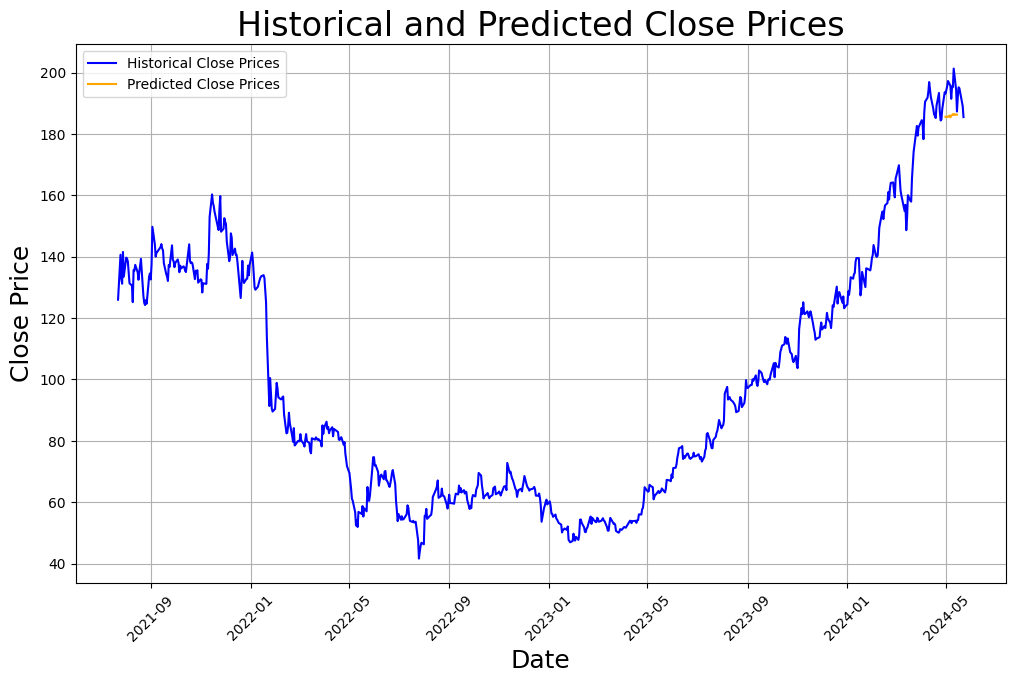

In [34]:
# plt.figure(figsize=(20, 10))
# plt.plot(df["Date"], df["Close"])
# plt.plot(predictions)

start_date = pd.to_datetime("2024-04-30")
date_range = pd.date_range(start=start_date, periods=15, freq="D")
predictions = model.predict(len(df), len(df) + 14)
predictions.index = date_range
df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(12, 7))
plt.plot(df["Date"], df["Close"], label='Historical Close Prices', color='blue')
plt.plot(predictions.index, predictions, label='Predicted Close Prices', color='orange')
plt.title('Historical and Predicted Close Prices', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.show()

In [8]:
# Define the stock ticker symbol
ticker_symbol = 'ZOMATO.NS'  # Example: Apple Inc.

# Define the date range
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)

# Fetch historical data
data = yf.Ticker(ticker_symbol)  # Create a Ticker object
prices = data.history(start=start_date, end=end_date)['Close']  # Get historical prices

# Display the prices
print(prices)

Date
2023-12-18 00:00:00+05:30    128.550003
2023-12-19 00:00:00+05:30    130.250000
2023-12-20 00:00:00+05:30    124.750000
2023-12-21 00:00:00+05:30    127.349998
2023-12-22 00:00:00+05:30    128.500000
                                ...    
2024-12-09 00:00:00+05:30    295.299988
2024-12-10 00:00:00+05:30    295.850006
2024-12-11 00:00:00+05:30    291.799988
2024-12-12 00:00:00+05:30    284.899994
2024-12-13 00:00:00+05:30    288.250000
Name: Close, Length: 244, dtype: float64


In [9]:
returns = prices.pct_change().dropna()
returns

Date
2023-12-19 00:00:00+05:30    0.013224
2023-12-20 00:00:00+05:30   -0.042226
2023-12-21 00:00:00+05:30    0.020842
2023-12-22 00:00:00+05:30    0.009030
2023-12-26 00:00:00+05:30   -0.027237
                               ...   
2024-12-09 00:00:00+05:30   -0.025252
2024-12-10 00:00:00+05:30    0.001863
2024-12-11 00:00:00+05:30   -0.013689
2024-12-12 00:00:00+05:30   -0.023646
2024-12-13 00:00:00+05:30    0.011759
Name: Close, Length: 243, dtype: float64

Text(0.5, 0, 'Date')

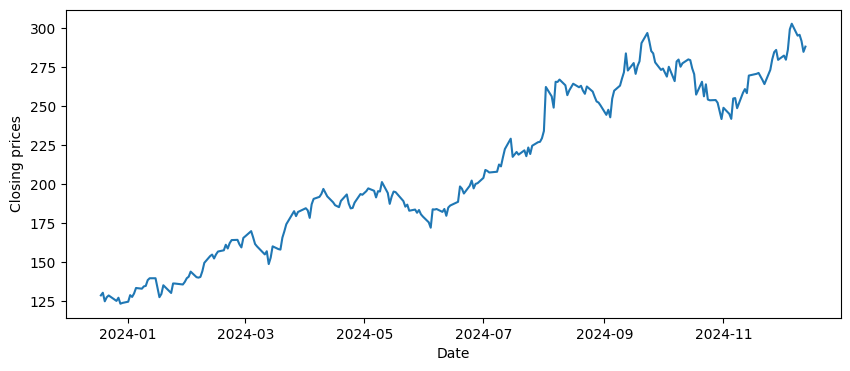

In [10]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing prices")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

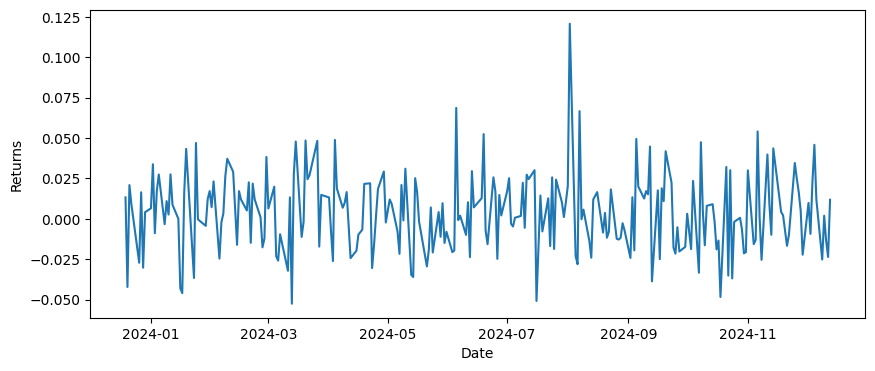

In [11]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")

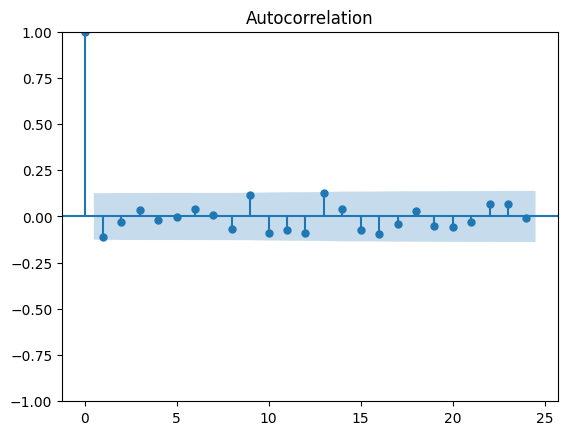

In [12]:
plot_acf(returns)
plt.show()

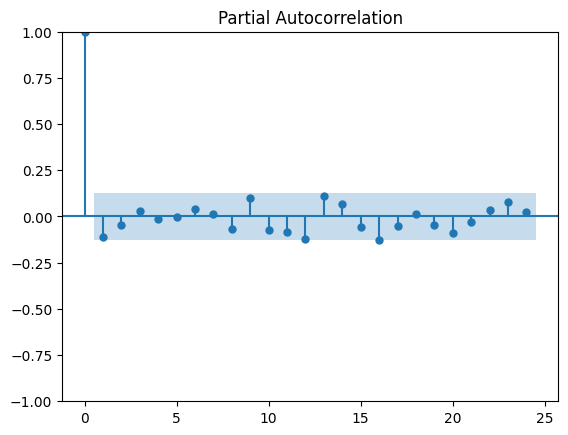

In [ ]:
plot_pacf(returns, method="ywm")
plt.show()

In [15]:
model = ARIMA(prices,order=(7,0,6))
fitted = model.fit()
print(fitted.summary())

c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary sta

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  244
Model:                 ARIMA(7, 0, 6)   Log Likelihood                -747.609
Date:                Tue, 17 Dec 2024   AIC                           1525.219
Time:                        10:51:24   BIC                           1577.676
Sample:                             0   HQIC                          1546.346
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.7493   1601.446      0.131      0.896   -2929.026    3348.525
ar.L1         -0.2277      0.118     -1.936      0.053      -0.458       0.003
ar.L2          0.0448      0.137      0.326      0.7

In [ ]:
next_predict = fitted.forecast(15,alpha=0.05)
print(next_predict)

c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Apurva\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


244    287.332985
245    287.624366
246    287.242392
247    287.717041
248    285.053832
249    286.300384
250    287.896736
251    288.233639
252    286.738079
253    286.543049
254    286.775313
255    285.729303
256    286.964185
257    287.788827
258    288.056321
Name: predicted_mean, dtype: float64


In [19]:
predicted_price = next_predict.values[0]
print(f"The predicted price for {tommorrow} tommorrow:", predicted_price)

The predicted price for 2024-12-17 tommorrow: 287.3329845998654
